In [1]:

pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip3 install 'tensorflow==2.15.0' --force-reinstall

  Obtaining dependency information for tensorflow==2.15.0 from https://files.pythonhosted.org/packages/93/c0/a774286d0383419f558deb27096e5de9f9facd6c27df8e9f9af6fba2f77e/tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Us

In [3]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
temp_df = pd.read_csv('CtoF.csv');

In [6]:
temp_df.head(2)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0


In [7]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## STEP#3:  **Create testing and training data set**

In [8]:
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

sns.scatterplot(x = x_train, y=y_train)

In [9]:
x_train.shape

(30,)

## STEP#4: **BUILD AND TRAIN THE MODEL**

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10,input_shape=[1]))
#1 nuron ( i.e. units


In [11]:
#Visualize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`Optimizers` update the model in response to the output of the loss function.
`optimizer` job is assist in minimizing the `loss`function.

In [12]:
#https://www.youtube.com/watch?v=-qT8fJTP3Ks&ab_channel=DigitalSreeni

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),loss='mean_squared_error')

In [13]:
epochs_hist = model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 131ms/step - loss: 2799.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1384.0978
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 961.3680
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1112.6820
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1284.0089
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 1252.1940
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1069.3091
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 861.0925
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 712.7281
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 640.2535
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 614.6215
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 598.3339
Epoch 13/100
1/1 [===========

##Model evaluation

In [14]:
w = model.get_weights()

In [15]:
w

[array([[1.8086386, 1.8083   , 1.8026853, 1.797592 , 1.8066003, 1.7979105,
         1.7950939, 1.812086 , 1.795695 , 1.807684 ]], dtype=float32),
 array([31.803734, 31.804071, 31.80146 , 31.802118, 31.803484, 31.804996,
        31.801334, 31.80731 , 31.802063, 31.802305], dtype=float32)]

In [16]:
loss = epochs_hist.history['loss']

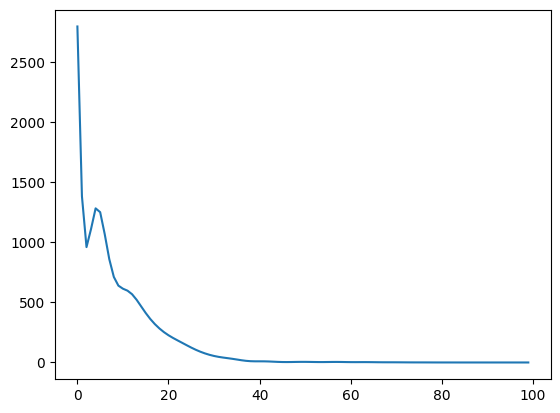

In [17]:
plt.plot(loss)

In [18]:
df = pd.DataFrame(loss)

In [19]:
df

,0
0,2799.221924
1,1384.097778
2,961.368042
3,1112.682007
4,1284.008911
...,...
95,0.061427
96,0.056661
97,0.058361
98,0.062432


In [20]:
df.sort_values("0")

KeyError: '0'